In [168]:
import pandas as pd
import numpy as np
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

In [169]:
df = pd.read_csv(r"C:\Users\mafaz\Downloads\HASU Historical Data.csv")

In [170]:
df.head()

,Date,Price,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,6/20/2022,32.2,NaN,NaN,NaN,NaN,NaN
1,6/21/2022,33.0,NaN,NaN,NaN,NaN,NaN
2,6/22/2022,33.0,NaN,NaN,NaN,NaN,NaN
3,6/23/2022,33.0,NaN,NaN,NaN,NaN,NaN
4,6/24/2022,35.0,NaN,NaN,NaN,NaN,NaN


In [171]:
df1 = df[["Date","Price"]]

In [172]:
df1["Time index"]=range(len(df1))
df1

,Date,Price,Time index
0,6/20/2022,32.2,0
1,6/21/2022,33.0,1
2,6/22/2022,33.0,2
3,6/23/2022,33.0,3
4,6/24/2022,35.0,4
...,...,...,...
493,7/8/2024,58.0,493
494,7/9/2024,57.8,494
495,7/10/2024,58.0,495
496,7/11/2024,58.1,496


In [173]:
df1["Ln(xt)"] = np.log(df1["Price"])

In [174]:
df1["ln(x)t-1"] = np.log(df1["Price"].shift(1))

In [175]:
df1["logreturn_t"] = df1["Ln(xt)"] - df1["ln(x)t-1"]
df1=df1.dropna()

In [176]:
mu = df1['logreturn_t'].mean()
sigma = df1['logreturn_t'].std()
print(" est_mu: ",mu)
print(" est_sigma: ", sigma)

 est_mu:  0.0011909837066137418
 est_sigma:  0.023382021704588297


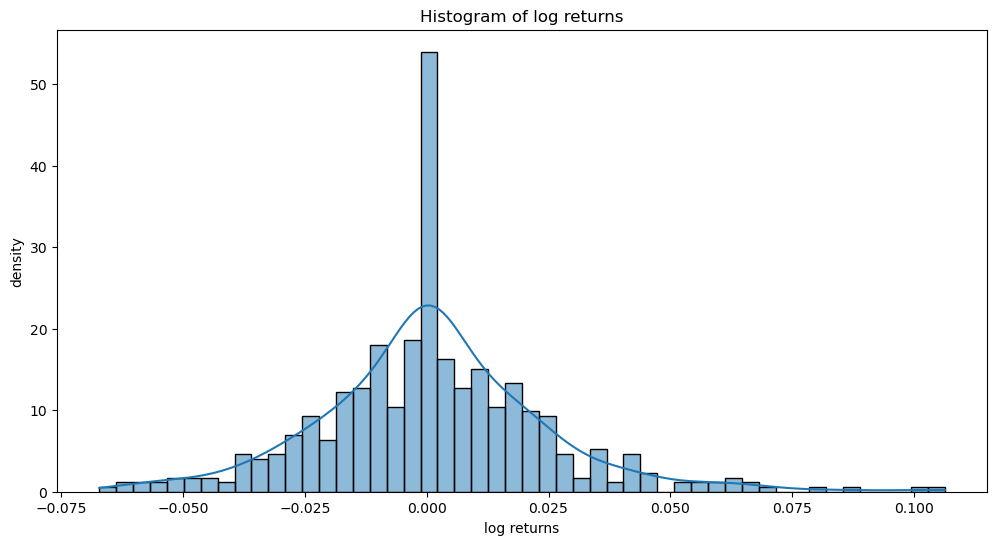

In [177]:
import seaborn as sns
from scipy.stats import norm

# Plot histogram of log returns
plt.figure(figsize=(12, 6))
sns.histplot(df1['logreturn_t'], bins=50, kde=True, stat='density') 
plt.title("Histogram of log returns")
plt.xlabel('log returns')
plt.ylabel('density')
plt.show()



In [178]:
#normaltiy test
import scipy.stats as stats
k2, p_value = stats.shapiro(df1['logreturn_t'])
print("Shapiro-Wilktest p-value:", p_value)
if p_value < 0.05:
    print("log returns does not come from a normally distribution.")
else:
    print("log returns comes from a normally distribution.")

Shapiro-Wilktest p-value: 9.790684929456006e-10
log returns does not come from a normally distribution.


In [179]:
#normaltiy test
import scipy.stats as stats
k2, p_value = stats.normaltest(df1['logreturn_t'])
print("Normality test p-value:", p_value,k2)
if p_value < 0.05:
    print("log returns does not come from a normally distribution.")
else:
    print("log returns comes from a normally distribution.")

Normality test p-value: 2.8619741208489025e-11 48.553848768344096
log returns does not come from a normally distribution.


In [180]:
#create a function to simulate sample paths
import math
def Geometric_Brownian (m,T,N,sigma,mu,w0,GB=False):
    # m- no of simulations
    # T- no of days
    # N- no of steps
    # mu- drift parameter
    # sigma - scale parameter
    # w0 - initial price value
    #time step
    dt = T/N
    #create an array to store simmulatated values
    x = np.zeros((m,N+1))
    #initial values of x
    x[:,0] = w0
    x0 = x[:,0] 
    if not GB:
        r = norm.rvs(size=x0.shape + (N,),loc = mu*dt, scale=sigma*math.sqrt(dt))
        np.cumsum(r,axis=1, out=x[:,1:])
        x[:,1:]+=w0
    else:
        r = norm.rvs(size=x0.shape + (N,),loc = mu*dt, scale=sigma*math.sqrt(dt))
        np.cumsum(r,axis=1, out=x[:,1:])
        if w0 !=0:
            x[:,1:]=w0*np.exp(x[:,1:])
        else:
            x[:,1:]=w0*np.exp(x[:,1:])
    return x



In [182]:
X=Geometric_Brownian(5000,20,20,sigma,mu,58.2,GB=True)
X.shape
simulated_df=pd.DataFrame(X)
simulated_df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,58.2,58.032280,57.140397,57.233620,60.174243,60.426728,59.301821,57.338790,56.648104,56.534265,...,53.430997,51.134537,52.083490,52.264370,53.626332,51.480053,51.809178,51.856526,48.631382,48.191965
1,58.2,58.340120,57.082530,54.289733,55.545478,54.006720,56.599239,55.597263,57.672105,58.000315,...,62.486952,61.789136,63.498012,62.509240,64.445278,64.733054,65.995794,67.214054,67.763898,69.233141
2,58.2,57.076664,55.561186,56.312617,57.043368,58.028960,59.091215,60.477227,60.976204,61.516616,...,65.091758,63.796804,62.417388,63.251186,63.469938,63.328578,63.023707,62.925431,62.258807,60.980357
3,58.2,57.851494,56.373300,55.379201,55.265769,55.121728,55.440283,57.055047,56.337793,57.017076,...,57.035947,56.677886,57.716159,58.675917,57.053803,57.301299,59.654562,60.865163,61.540473,62.777290
4,58.2,58.261440,59.347649,57.872763,58.530227,59.492540,59.400960,58.568999,58.580093,58.670906,...,58.729698,61.283850,59.769365,59.430935,60.502819,59.346938,59.232529,59.037668,60.787887,62.230491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,58.2,59.073970,57.843771,58.090450,59.010095,58.702521,59.874887,60.533960,57.866563,61.012667,...,61.975986,62.107746,61.221119,60.967252,60.532665,60.458231,61.597035,60.998109,58.726766,59.659921
4996,58.2,55.222759,56.255253,57.943039,57.928924,60.257253,62.965243,62.642318,62.992291,63.671115,...,62.895298,63.416184,65.990609,64.533086,66.118684,63.275536,64.509622,63.568936,62.687963,64.511570
4997,58.2,57.008210,57.668927,55.290021,55.657722,56.560478,57.497265,57.913020,59.259532,57.575483,...,56.002050,57.544447,57.293724,55.062932,56.199274,57.470115,58.277072,57.420213,55.560062,56.564722
4998,58.2,62.624768,59.833102,61.079176,59.899668,60.153377,62.010673,63.648568,64.971914,67.310593,...,65.129873,68.282082,68.289426,67.907572,66.453097,62.654361,63.330701,66.204624,65.502461,66.477830


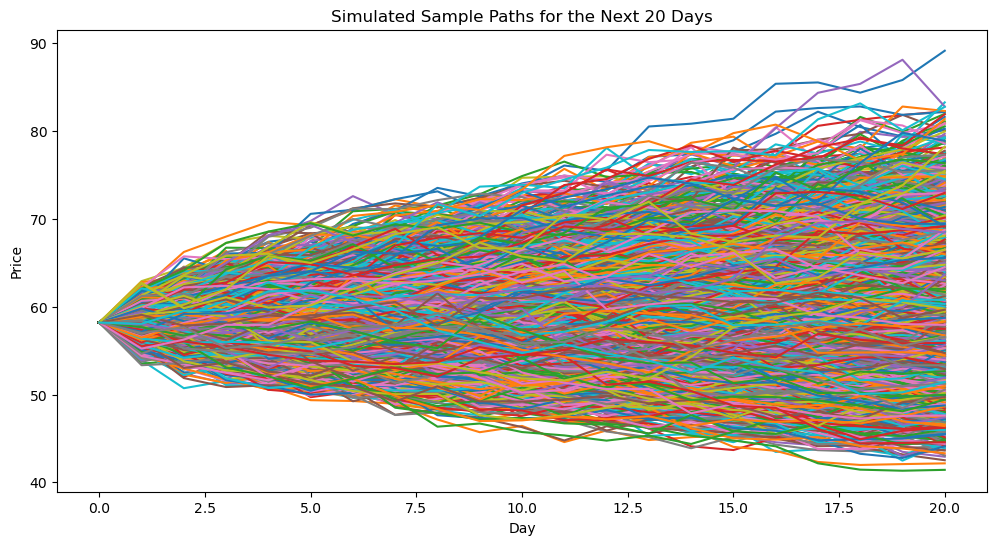

In [186]:
# Plot the sample paths
plt.figure(figsize=(12, 6))
plt.plot(simulated_df.T)
plt.title("Simulated Sample Paths for the Next 20 Days")
plt.xlabel("Day")
plt.ylabel("Price")
plt.show()

In [188]:
simulated_df.T.iloc[-1]

0       48.191965
1       69.233141
2       60.980357
3       62.777290
4       62.230491
          ...    
4995    59.659921
4996    64.511570
4997    56.564722
4998    66.477830
4999    51.418809
Name: 20, Length: 5000, dtype: float64

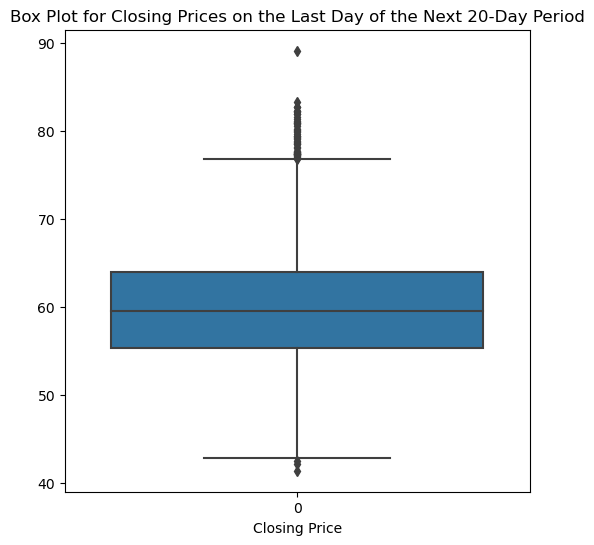

In [210]:
#Box plot closing price of 20th day
plt.figure(figsize=(6, 6))
sns.boxplot(simulated_df.T.iloc[-1])
plt.title("Box Plot for Closing Prices on the Last Day of the Next 20-Day Period")
plt.xlabel("Closing Price")
plt.show()

In [206]:
lastday_value = simulations_df.T.iloc[-1]
prob = len(lastday_value[(lastday_value > 55) & (lastday_value < 60)])/len(lastday_value)
print("probability that the closing price corresponding to the last day of the next 20-day period is between 55 and 60 : ",prob)

probability that the closing price corresponding to the last day of the next 20-day period is between 55 and 60 :  0.75


In [208]:
prediction_interval = np.percentile(lastday_value, [2.5, 97.5])
print("prediction_interval of last day : ",prediction_interval)

prediction_interval of last day :  [54.08540255 58.11919767]
